In [10]:
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)

In [11]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

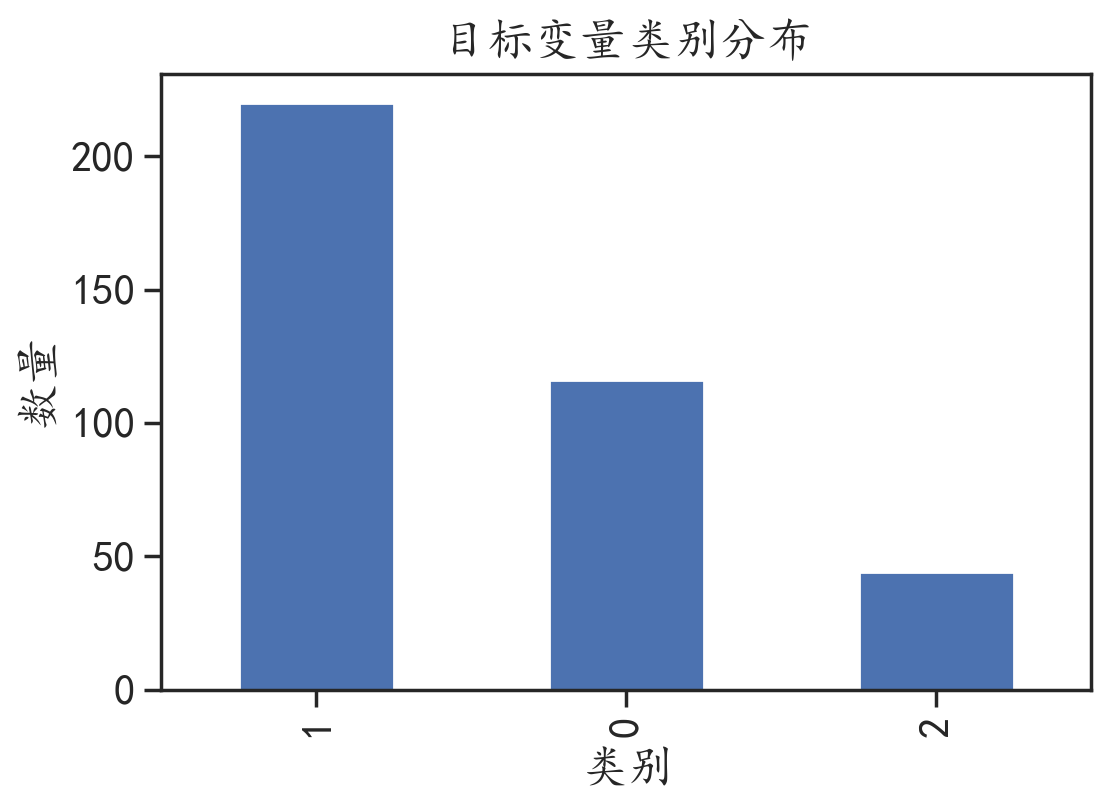

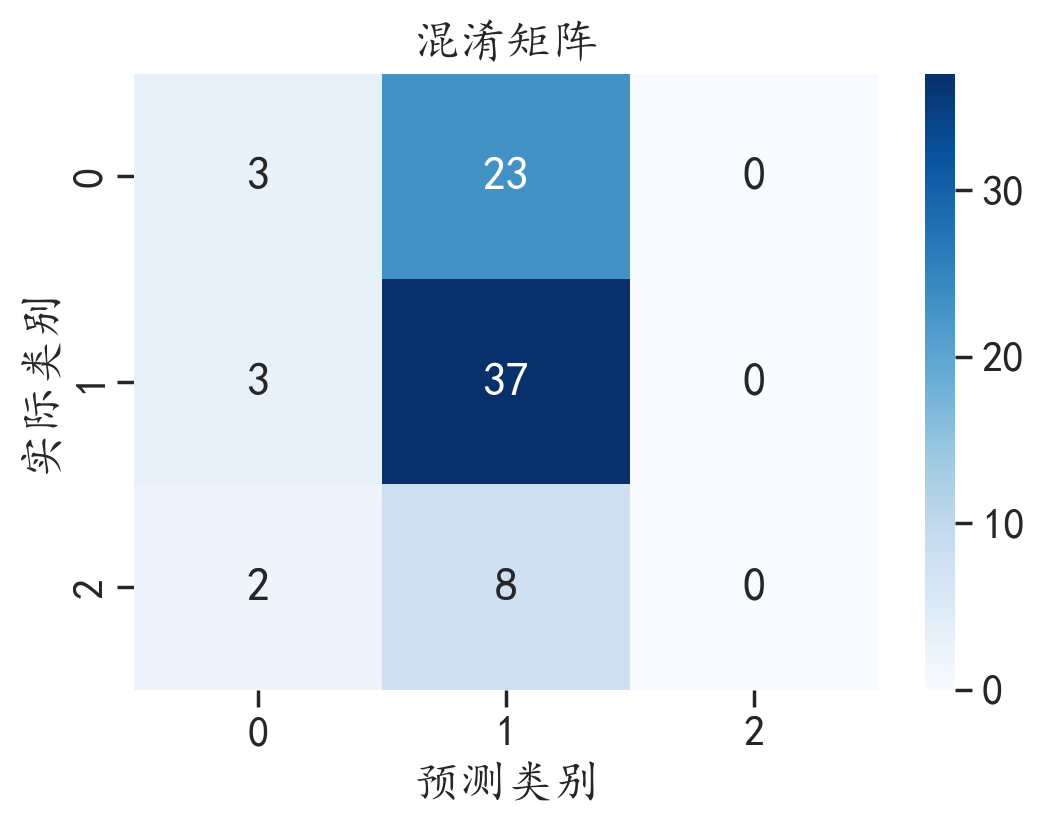

分类报告：
              precision    recall  f1-score   support

           0       0.38      0.12      0.18        26
           1       0.54      0.93      0.69        40
           2       0.00      0.00      0.00        10

    accuracy                           0.53        76
   macro avg       0.31      0.35      0.29        76
weighted avg       0.41      0.53      0.42        76



d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


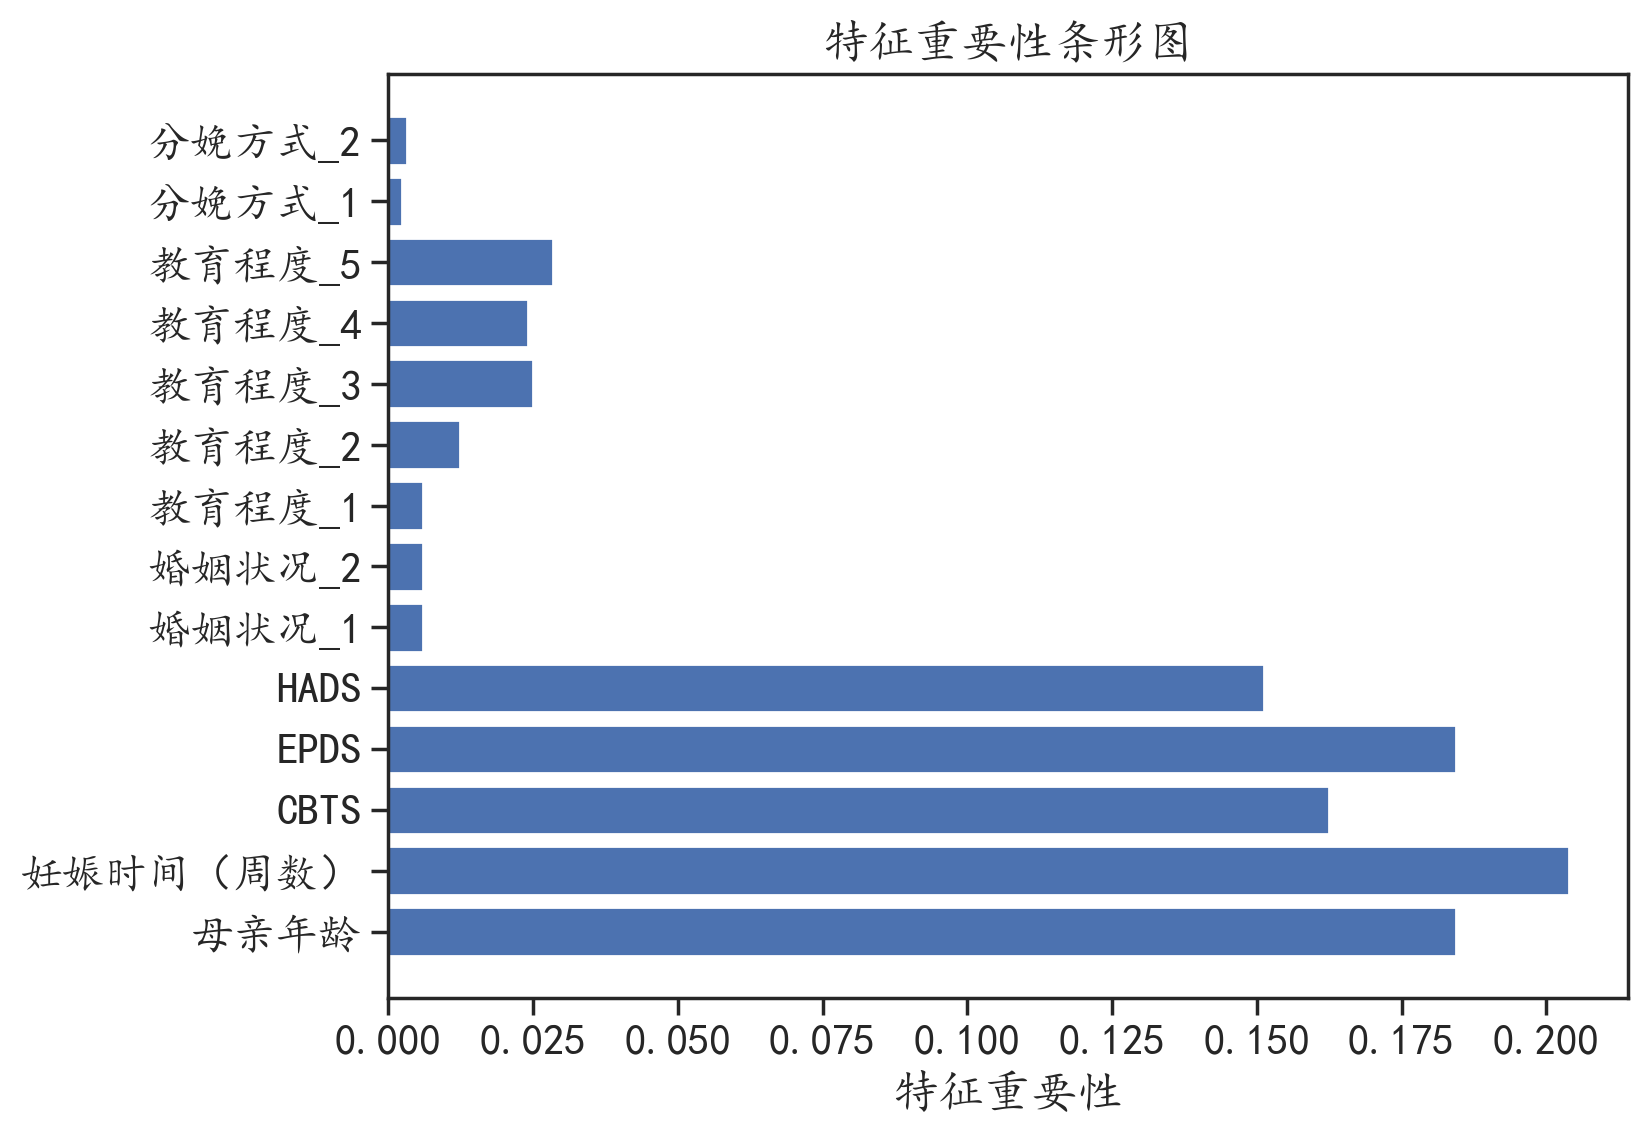

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data2.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['婴儿行为特征']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 建立随机森林模型
model = RandomForestClassifier()

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 绘制特征重要性条形图
plt.figure(figsize=(8, 6))
feat_importance = model.feature_importances_
feat_names = X_encoded.columns
plt.barh(feat_names, feat_importance)
plt.xlabel('特征重要性')
plt.title('特征重要性条形图')
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV


In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [15]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [16]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy found: 0.60


In [17]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

分类报告：
              precision    recall  f1-score   support

           0       0.44      0.15      0.23        26
           1       0.55      0.93      0.69        40
           2       0.00      0.00      0.00        10

    accuracy                           0.54        76
   macro avg       0.33      0.36      0.31        76
weighted avg       0.44      0.54      0.44        76



d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
import pandas as pd

new_data = pd.read_csv('pred.csv')


In [19]:
# 假设新数据的特征与训练数据相同，直接选取相同的特征列
X_new = new_data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 对婚姻状况、教育程度、分娩方式进行热编码
X_new_encoded = pd.get_dummies(X_new, columns=['婚姻状况', '教育程度', '分娩方式'])



In [20]:
# 使用之前调优过的最佳模型
#best_model = grid_search.best_estimator_

# # 对新数据进行预测
y_pred_new = best_model.predict(X_new_encoded)
#y_pred_new = model.predict(X_new_encoded)

In [24]:
new_data_with_predictions = new_data.copy()
new_data_with_predictions['Predicted_婴儿行为特征'] = y_pred_new

# Print the new DataFrame
# Print rows from index 390 to the end
print(new_data_with_predictions.tail(20))

     母亲年龄  婚姻状况  教育程度  妊娠时间（周数）  分娩方式  CBTS  EPDS  HADS   编号  Predicted_婴儿行为特征
381    29     2     4      40.0     1     7    15    12  382                 1
382    29     2     3      42.0     1     9    14    12  383                 1
383    23     2     2      38.5     1     7    12     7  384                 1
384    27     2     3      36.3     1     8     4     5  385                 1
385    36     2     4      39.0     1     6     6     8  386                 1
386    30     2     5      41.2     1     5     8     5  387                 1
387    28     2     2      40.6     1     8    11     9  388                 1
388    32     2     5      37.0     1     3     6     7  389                 1
389    28     2     5      38.0     1     7    11     5  390                 1
390    31     2     4      42.0     1     4     5     8  391                 1
391    25     2     2      40.5     1    16    22    15  392                 1
392    27     2     5      40.4     1     4     6   